In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.stats import norm
from sklearn.pipeline import  Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [2]:
# 数据生成
x = np.arange(0, 1, 0.002)
y = norm.rvs(0, size=500, scale=0.1)
y = y + x ** 2

In [6]:
# 均方误差根
def rmse(y_test, y):
    return sp.sqrt(sp.mean((y_test - y) ** 2))

In [7]:
# 与均值相比的优秀程度，介于[0~1]。0表示不如均值。1表示完美预测.这个版本的实现是参考scikit-learn官网文档
def R2(y_test, y_true):
    return 1 - ((y_test - y_true) ** 2).sum() / ((y_true - y_true.mean()) ** 2).sum()

In [8]:
def R22(y_test, y_true):
    y_mean = np.array(y_true)
    y_mean[:] = y_mean.mean()
    return 1 - rmse(y_test, y_true) / rmse(y_mean, y_true)

In [9]:
plt.scatter(x, y, s=5)
degree = [1,2,100]
y_test = []
y_test = np.array(y_test)

[-0.15692191  0.9823778 ]
rmse=0.12, R2=0.84, R22=0.60, clf.score=0.84
[ 0.01426096 -0.04884429  1.03328867]
rmse=0.10, R2=0.90, R22=0.69, clf.score=0.90
[ -1.42539727e-02  -2.12291392e+01   4.22818962e+03  -2.60284279e+05
   8.09446110e+06  -1.52231424e+08   1.89661354e+09  -1.64778108e+10
   1.02712272e+11  -4.64796768e+11   1.52002830e+12  -3.49519546e+12
   5.23816632e+12  -3.95759452e+12  -1.00103748e+12   4.07985146e+12
  -3.95727334e+11  -3.23019777e+12  -5.95470942e+11   2.82310699e+12
   1.96419253e+12  -1.32565451e+12  -2.73686268e+12  -1.03053716e+12
   1.23488214e+12   2.50036742e+12   1.54659358e+12  -7.82609777e+11
  -2.18013237e+12  -2.05664634e+12  -4.60317928e+11   1.10389720e+12
   2.07401179e+12   1.64828809e+12   8.37238092e+11  -9.52390221e+11
  -1.56911242e+12  -1.97422582e+12  -1.18937979e+12  -7.37891736e+10
   1.03149625e+12   1.72013949e+12   1.58169425e+12   1.24308113e+12
   2.06008294e+11  -7.81442519e+11  -1.47849290e+12  -1.57860805e+12
  -1.33133125e+12 

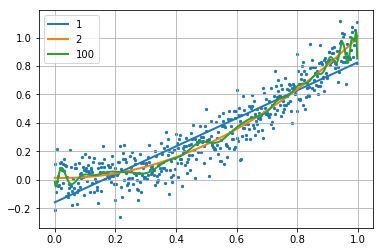

In [11]:
for d in degree:
    clf = Pipeline([('poly', PolynomialFeatures(degree=d)),
                   ('linear', LinearRegression(fit_intercept=False))])
    clf.fit(x[:, np.newaxis], y)
    y_test = clf.predict(x[:, np.newaxis])
    
    print(clf.named_steps['linear'].coef_)
    print('rmse=%.2f, R2=%.2f, R22=%.2f, clf.score=%.2f' % 
         (rmse(y_test, y),
          R2(y_test, y),
          R22(y_test, y),
          clf.score(x[:, np.newaxis], y)))
    
    plt.plot(x, y_test, linewidth=2)

plt.grid()
plt.legend(['1', '2', '100'], loc='upper left')
plt.show()